### Video Link: https://drive.google.com/file/d/1KlbsJtrX-ZJf7tXt3Td6Q7051kjMA3hq/view?usp=sharing

### 1: Data Manipulation


a. Read the provided CSV file ‘data.csv’.

b. https://drive.google.com/drive/folders/1h8C3mLsso-R-sIOLsvoYwPLzy2fJ4IOF?usp=sharing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# a. Reading the data.csv file
df = pd.read_csv("data.csv")
# displaying the first 5 rows
df.head()


,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0


c. Show the basic statistical description about the data.


In [2]:
print("Statistical Description:\n")
# describe method to get the statistical description
df.describe()

Statistical Description:



,Duration,Pulse,Maxpulse,Calories
count,169.000000,169.000000,169.000000,164.000000
mean,63.846154,107.461538,134.047337,375.790244
std,42.299949,14.510259,16.450434,266.379919
min,15.000000,80.000000,100.000000,50.300000
25%,45.000000,100.000000,124.000000,250.925000
50%,60.000000,105.000000,131.000000,318.600000
75%,60.000000,111.000000,141.000000,387.600000
max,300.000000,159.000000,184.000000,1860.400000


d. Check if the data has null values.
    
        d.i. Replace the null values with the mean

In [3]:
# isnull method to check for null values
print("\nNull Values in Data:\n", df.isnull().sum())

# d.i Replacing the null values with mean value
df.fillna(df.mean(), inplace=True)
print("\nData after replacing null values with mean:\n")
df


Null Values in Data:
 Duration    0
Pulse       0
Maxpulse    0
Calories    5
dtype: int64

Data after replacing null values with mean:



,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
...,...,...,...,...
164,60,105,140,290.8
165,60,110,145,300.0
166,60,115,145,310.2
167,75,120,150,320.4


e. Select at least two columns and aggregate the data using: min, max, count, mean.

In [4]:
# Selected Duration, Calories columns and aggregate the data using min, max, count and mean.
agg_columns = ['Duration', 'Calories']
aggregated_data = df[agg_columns].agg(['min', 'max', 'count', 'mean']) # min, max, count and mean
print("Aggregated Data:")
aggregated_data

Aggregated Data:


,Duration,Calories
min,15.000000,50.300000
max,300.000000,1860.400000
count,169.000000,169.000000
mean,63.846154,375.790244


f. Filter the dataframe to select the rows with calories values between 500 and 1000

In [5]:
# filtering the dataframe where calories is between 500 and 1000
calories_df1 = df[(df["Calories"] >= 500) & (df["Calories"] <= 1000)]
print("Filtered Data (Calories between 500 and 1000):")
calories_df1.head()

Filtered Data (Calories between 500 and 1000):


,Duration,Pulse,Maxpulse,Calories
51,80,123,146,643.1
62,160,109,135,853.0
65,180,90,130,800.4
66,150,105,135,873.4
67,150,107,130,816.0


g. Filter the dataframe to select the rows with calories values > 500 and pulse < 100

In [6]:
# Fltering the dataframe where Calories is greater than 500 and Pulse is less than 100
calories_df2 = df[(df["Calories"] > 500) & (df["Pulse"] < 100)]
print("Filtered Data (Calories > 500 and Pulse < 100):")
calories_df2

Filtered Data (Calories > 500 and Pulse < 100):


,Duration,Pulse,Maxpulse,Calories
65,180,90,130,800.4
70,150,97,129,1115.0
73,150,97,127,953.2
75,90,98,125,563.2
99,90,93,124,604.1
103,90,90,100,500.4
106,180,90,120,800.3
108,90,90,120,500.3


h. Create a new “df_modified” dataframe that contains all the columns from df except for “Maxpulse”.

In [7]:
# drop the "Maxpulse" column from the dataframe and create a new dataframe named "df_modified"
df_modified = df.drop(columns=["Maxpulse"])
print("Modified DataFrame (Without Maxpulse):") 
df_modified.head()

Modified DataFrame (Without Maxpulse):


,Duration,Pulse,Calories
0,60,110,409.1
1,60,117,479.0
2,60,103,340.0
3,45,109,282.4
4,45,117,406.0


i. Delete the “Maxpulse” column from the main df dataframe

In [8]:
# droping the "Maxpulse" column from the original/main dataframe
df.drop(columns=["Maxpulse"], inplace=True)
print("Main DataFrame (Without Maxpulse):")
df.head()

Main DataFrame (Without Maxpulse):


,Duration,Pulse,Calories
0,60,110,409.1
1,60,117,479.0
2,60,103,340.0
3,45,109,282.4
4,45,117,406.0


j. Convert the datatype of Calories column to int datatype

In [9]:
# calories column is of float type. Let's convert it to int type
df["Calories"] = df["Calories"].astype(int) 
print("Main DataFrame (Calories datatype changed to int):")
df.head()

Main DataFrame (Calories datatype changed to int):


,Duration,Pulse,Calories
0,60,110,409
1,60,117,479
2,60,103,340
3,45,109,282
4,45,117,406


k. Using pandas create a scatter plot for the two columns (Duration and Calories).


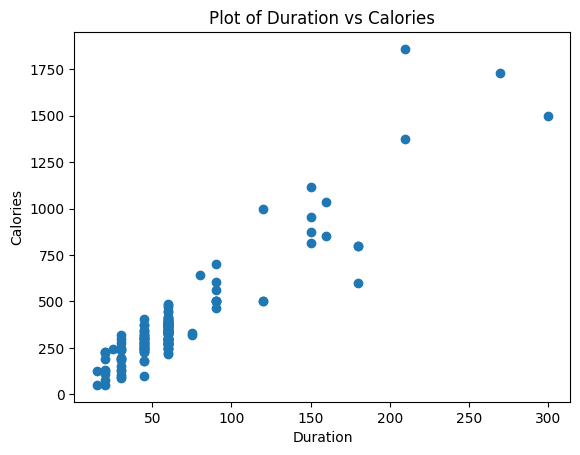

In [10]:
# plotting a scatter plot of duration vs calories
plt.scatter(df["Duration"], df["Calories"])
# adding labels and title
plt.xlabel("Duration") # x-axis
plt.ylabel("Calories") # y-axis
plt.title("Plot of Duration vs Calories")
plt.show()

## 2. Linear Regression

In [11]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # for splitting the data
from sklearn.linear_model import LinearRegression # for linear regression
from sklearn.metrics import mean_squared_error # for calculating mean squared error

a) Import the given “Salary_Data.csv”

In [12]:
# import the dataset
salary_df = pd.read_csv("Salary_Data.csv")
# displaying the first 5 rows
salary_df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


b) Split the data in train_test partitions, such that 1/3 of the data is reserved as test subset.

In [13]:
# splitting the dataset into train and test sets
test_size = 1/3
X = salary_df[["YearsExperience"]] # years of experience as input
y = salary_df[["Salary"]] # salary as output
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

c) Train and predict the model.

In [14]:
# creating a linear regression model
model = LinearRegression()
# training the model
model.fit(X_train, y_train)
# predicting on X_train to calculate mean squared error
predict_on_trainData = model.predict(X_train)
# predicting on X_test to calculate mean squared error
predict_on_testData = model.predict(X_test)

d) Calculate the mean_squared error

In [15]:
# calculating mean squared error on train data
print("Mean Squared Error (Train Data):")
output_train= mean_squared_error(y_train, predict_on_trainData)
print(output_train)
# calculating mean squared error on test data
print("Mean Squared Error (Test Data):")
output_test= mean_squared_error(y_test, predict_on_testData)
print(output_test)


Mean Squared Error (Train Data):
29793161.082422983
Mean Squared Error (Test Data):
35301898.887134895


e) Visualize both train and test data using scatter plot.

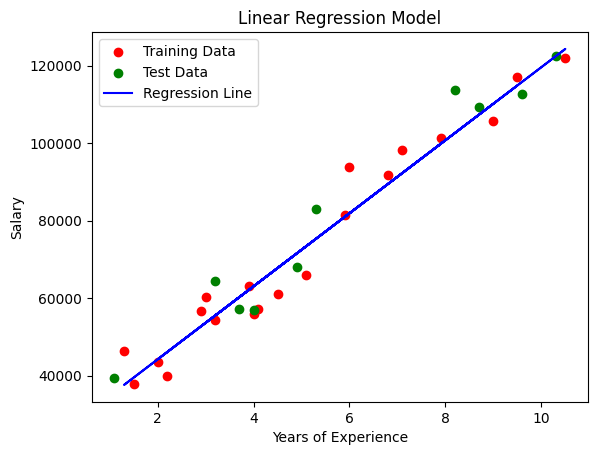

In [16]:
# plotting the scatter plot on train and test data
plt.scatter(X_train, y_train, color="red", label="Training Data")  # Train data
plt.scatter(X_test, y_test, color="green", label="Test Data")  # Test data
plt.plot(X_train, predict_on_trainData, color="blue", label="Regression Line")  # Regression line
plt.xlabel("Years of Experience") # x-axis
plt.ylabel("Salary") # y-axis
plt.title("Linear Regression Model") # title
plt.legend() # legend
plt.show()